In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import seaborn.objects as so
from scipy import stats
import koreanize_matplotlib
koreanize_matplotlib.koreanize()

In [2]:
# 데이터 불러오기
df = pd.read_csv(r'E:\2026_1\캐글 공모전\playground-series-s6e1\train.csv')
df_test = pd.read_csv(r'E:\2026_1\캐글 공모전\playground-series-s6e1\test.csv')

In [3]:
df.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB


In [5]:
df.isnull().sum()

id                  0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

## 데이터 전처리

In [6]:
# 범주형 변수 확인
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("범주형 변수:", cat_cols)

범주형 변수: ['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']


In [7]:
# 각 범주형 변수의 고유값 확인
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")

gender: ['female' 'other' 'male']
course: ['b.sc' 'diploma' 'bca' 'b.com' 'ba' 'bba' 'b.tech']
internet_access: ['no' 'yes']
sleep_quality: ['average' 'poor' 'good']
study_method: ['online videos' 'self-study' 'coaching' 'group study' 'mixed']
facility_rating: ['low' 'medium' 'high']
exam_difficulty: ['easy' 'moderate' 'hard']


In [8]:
# 원핫인코딩
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df_test_encoded = pd.get_dummies(df_test, columns=cat_cols, drop_first=True)

In [9]:
# train과 test 컬럼 맞추기
missing_cols = set(df_encoded.columns) - set(df_test_encoded.columns) - {'exam_score'}
for col in missing_cols:
    df_test_encoded[col] = 0

df_test_encoded = df_test_encoded[df_encoded.drop(columns=['exam_score']).columns]

In [10]:
df_encoded.shape

(630000, 25)

## X, Y 분리 및 스케일링

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [12]:
# X, Y 분리
x_list = df_encoded.drop(columns=['id', 'exam_score']).columns
Y = df_encoded['exam_score']
X = df_encoded[x_list]

print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (630000, 23)
Y shape: (630000,)


In [13]:
# 스케일링
scl = StandardScaler()
X_scaled = pd.DataFrame(scl.fit_transform(X), columns=x_list)
X_scaled.head()

,age,study_hours,class_attendance,sleep_hours,gender_male,gender_other,course_b.sc,course_b.tech,course_ba,course_bba,...,sleep_quality_good,sleep_quality_poor,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,facility_rating_low,facility_rating_medium,exam_difficulty_hard,exam_difficulty_moderate
0,0.200943,1.655875,1.538302,-1.245269,-0.708605,-0.709879,2.155804,-0.512955,-0.330354,-0.369397,...,-0.714922,-0.716408,-0.492570,-0.492762,2.050195,-0.512695,1.402287,-0.717441,-0.433024,-1.132457
1,-1.126352,0.401573,1.308814,-1.359895,-0.708605,1.408691,-0.463864,-0.512955,-0.330354,-0.369397,...,-0.714922,1.395852,-0.492570,-0.492762,-0.487758,1.950476,-0.713121,1.393843,-0.433024,0.883035
2,-0.241488,0.287160,1.182595,-0.729454,-0.708605,-0.709879,2.155804,-0.512955,-0.330354,-0.369397,...,-0.714922,1.395852,-0.492570,-0.492762,-0.487758,-0.512695,-0.713121,-0.717441,-0.433024,0.883035
3,-0.683920,-0.848492,-1.290141,0.703367,1.411224,-0.709879,2.155804,-0.512955,-0.330354,-0.369397,...,-0.714922,-0.716408,2.030167,-0.492762,-0.487758,-0.512695,-0.713121,-0.717441,-0.433024,0.883035
4,1.085807,1.545699,0.855575,1.448434,1.411224,-0.709879,-0.463864,-0.512955,-0.330354,-0.369397,...,1.398753,-0.716408,-0.492570,-0.492762,-0.487758,1.950476,-0.713121,-0.717441,-0.433024,-1.132457


In [14]:
# train/test 분할
x_tr, x_ts, y_tr, y_ts = train_test_split(X_scaled, Y, test_size=0.2, random_state=1234)
print("train shape:", x_tr.shape)
print("test shape:", x_ts.shape)

train shape: (504000, 23)
test shape: (126000, 23)


## 딥러닝 모델 구성 (회귀)

In [18]:
from tensorflow.keras import models, callbacks, Input
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.metrics import R2Score
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.initializers import HeNormal

In [19]:
# 입력 차원 확인
input_dim = x_tr.shape[1]
print("입력 차원:", input_dim)

입력 차원: 23


In [20]:
# 기본 회귀 모델 구성
model_reg = models.Sequential([
    Input(shape=(input_dim,)),
    
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    
    Dense(1, activation='linear')
])

model_reg.compile(optimizer='rmsprop', loss='mse', metrics=[R2Score()])

model_reg.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               3072      
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 77313 (302.00 KB)
Trainable params: 77313 (302.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# 모델 학습
result_reg = model_reg.fit(
    x_tr, y_tr, 
    epochs=100,
    batch_size=1024,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100

394/394 [==============================] - 5s 10ms/step - loss: 186.1122 - r2_score: 0.4798 - val_loss: 102.9244 - val_r2_score: 0.7129
Epoch 2/100
394/394 [==============================] - 3s 9ms/step - loss: 93.0619 - r2_score: 0.7399 - val_loss: 91.8644 - val_r2_score: 0.7437
Epoch 3/100
394/394 [==============================] - 3s 8ms/step - loss: 90.6972 - r2_score: 0.7465 - val_loss: 80.6618 - val_r2_score: 0.7750
Epoch 4/100
394/394 [==============================] - 3s 7ms/step - loss: 88.9707 - r2_score: 0.7513 - val_loss: 89.0233 - val_r2_score: 0.7516
Epoch 5/100
394/394 [==============================] - 3s 8ms/step - loss: 87.7601 - r2_score: 0.7547 - val_loss: 97.4584 - val_r2_score: 0.7281
Epoch 6/100
394/394 [==============================] - 3s 8ms/step - loss: 87.0461 - r2_score: 0.7567 - val_loss: 87.6913 - val_r2_score: 0.7554
Epoch 7/100
394/394 [==============================] - 3s 8ms/step - loss: 86.3803 - r2_score: 0.7585 - val_loss: 92.4853 - va

In [22]:
# 학습 결과 시각화
reg_df = pd.DataFrame(result_reg.history).reset_index()
reg_df

,index,loss,r2_score,val_loss,val_r2_score
0,0,186.112183,0.479761,102.924408,0.712855
1,1,93.061913,0.739866,91.864418,0.743711
2,2,90.697212,0.746477,80.661819,0.774964
3,3,88.970695,0.751299,89.023315,0.751637
4,4,87.760139,0.754683,97.458389,0.728104
...,...,...,...,...,...
95,95,77.471123,0.783449,81.336723,0.773081
96,96,77.375778,0.783714,83.759293,0.766323
97,97,77.440964,0.783530,81.061966,0.773848
98,98,77.298813,0.783928,81.600021,0.772347


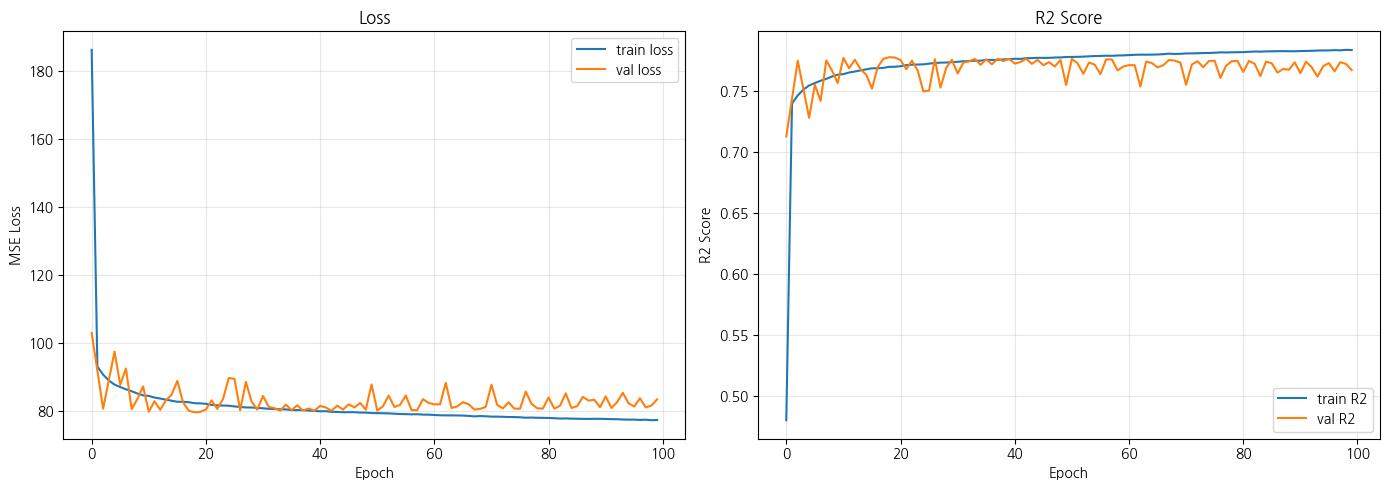

In [23]:
# loss 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(reg_df['loss'], label='train loss')
axes[0].plot(reg_df['val_loss'], label='val loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MSE Loss')
axes[0].set_title('Loss')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].plot(reg_df['r2_score'], label='train R2')
axes[1].plot(reg_df['val_r2_score'], label='val R2')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('R2 Score')
axes[1].set_title('R2 Score')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [24]:
# 성능 평가
print("Train 성능:")
model_reg.evaluate(x_tr, y_tr)

Train 성능:
15750/15750 [==============================] - 24s 2ms/step - loss: 78.8231 - r2_score: 0.7798


[78.82310485839844, 0.7797715663909912]

In [25]:
print("Test 성능:")
model_reg.evaluate(x_ts, y_ts)

Test 성능:
3938/3938 [==============================] - 6s 1ms/step - loss: 84.0972 - r2_score: 0.7649


[84.09716796875, 0.764879584312439]

In [26]:
from sklearn.metrics import r2_score, mean_squared_error

In [27]:
# 예측값 생성
y_tr_pred = model_reg.predict(x_tr)
y_ts_pred = model_reg.predict(x_ts)

3938/3938 [==============================] - 5s 1ms/step


In [28]:
# sklearn R2 계산
print("Train R2:", r2_score(y_tr, y_tr_pred))
print("Test R2:", r2_score(y_ts, y_ts_pred))
print()
print("Train RMSE:", np.sqrt(mean_squared_error(y_tr, y_tr_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_ts, y_ts_pred)))

Train R2: 0.7797518312095586
Test R2: 0.7648828424824261

Train RMSE: 8.878239874173602
Test RMSE: 9.170452294861098


## 조기 종료 적용

In [29]:
# 조기종료 모델 구성
model_early = models.Sequential([
    Input(shape=(input_dim,)),
    
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    
    Dense(1, activation='linear')
])

model_early.compile(optimizer='rmsprop', loss='mse', metrics=[R2Score()])

In [30]:
# EarlyStopping 콜백 설정
early = callbacks.EarlyStopping(
    patience=10, 
    restore_best_weights=True,
    monitor='val_loss'
)

In [31]:
# 학습
result_early = model_early.fit(
    x_tr, y_tr,
    epochs=200,
    batch_size=1024,
    validation_split=0.2,
    callbacks=[early],
    verbose=1
)

Epoch 1/200
394/394 [==============================] - 4s 8ms/step - loss: 187.2306 - r2_score: 0.4766 - val_loss: 91.4799 - val_r2_score: 0.7448
Epoch 2/200
394/394 [==============================] - 3s 8ms/step - loss: 93.1315 - r2_score: 0.7397 - val_loss: 83.9715 - val_r2_score: 0.7657
Epoch 3/200
394/394 [==============================] - 4s 9ms/step - loss: 90.5786 - r2_score: 0.7468 - val_loss: 84.0235 - val_r2_score: 0.7656
Epoch 4/200
394/394 [==============================] - 4s 10ms/step - loss: 88.9210 - r2_score: 0.7514 - val_loss: 80.5013 - val_r2_score: 0.7754
Epoch 5/200
394/394 [==============================] - 3s 8ms/step - loss: 87.7565 - r2_score: 0.7547 - val_loss: 80.7506 - val_r2_score: 0.7747
Epoch 6/200
394/394 [==============================] - 3s 8ms/step - loss: 86.6819 - r2_score: 0.7577 - val_loss: 83.0104 - val_r2_score: 0.7684
Epoch 7/200
394/394 [==============================] - 4s 10ms/step - loss: 86.0207 - r2_score: 0.7595 - val_loss: 81.2203 - val

In [32]:
# 조기종료 성능 확인
print("Train 성능:")
model_early.evaluate(x_tr, y_tr)

Train 성능:
15750/15750 [==============================] - 22s 1ms/step - loss: 80.1417 - r2_score: 0.7761


[80.14165496826172, 0.7760875821113586]

In [33]:
print("Test 성능:")
model_early.evaluate(x_ts, y_ts)

Test 성능:
3938/3938 [==============================] - 5s 1ms/step - loss: 80.8806 - r2_score: 0.7739


[80.88057708740234, 0.7738725543022156]

## 배치정규화 + He 초기화 적용

In [34]:
# 배치정규화 + He 초기화 모델
model_bn = models.Sequential([
    Input(shape=(input_dim,)),
    
    BatchNormalization(),
    Dense(128, activation='relu', kernel_initializer=HeNormal(), use_bias=False),
    
    BatchNormalization(),
    Dense(256, activation='relu', kernel_initializer=HeNormal(), use_bias=False),
    
    BatchNormalization(),
    Dense(128, activation='relu', kernel_initializer=HeNormal(), use_bias=False),
    
    BatchNormalization(),
    Dense(64, activation='relu', kernel_initializer=HeNormal(), use_bias=False),
    
    Dense(1, activation='linear')
])

model_bn.compile(
    optimizer=RMSprop(clipvalue=1.5), 
    loss='mse', 
    metrics=[R2Score()]
)

model_bn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 23)                92        
 Normalization)                                                  
                                                                 
 dense_15 (Dense)            (None, 128)               2944      
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_16 (Dense)            (None, 256)               32768     
                                                                 
 batch_normalization_2 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                      

In [35]:
# 학습
early_bn = callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss')

result_bn = model_bn.fit(
    x_tr, y_tr,
    epochs=200,
    batch_size=1024,
    validation_split=0.2,
    callbacks=[early_bn],
    verbose=1
)

Epoch 1/200
394/394 [==============================] - 6s 13ms/step - loss: 612.2596 - r2_score: -0.7114 - val_loss: 100.9967 - val_r2_score: 0.7182
Epoch 2/200
394/394 [==============================] - 4s 10ms/step - loss: 85.4975 - r2_score: 0.7610 - val_loss: 90.9041 - val_r2_score: 0.7464
Epoch 3/200
394/394 [==============================] - 5s 12ms/step - loss: 84.4083 - r2_score: 0.7641 - val_loss: 82.1307 - val_r2_score: 0.7709
Epoch 4/200
394/394 [==============================] - 5s 12ms/step - loss: 84.1170 - r2_score: 0.7649 - val_loss: 85.9670 - val_r2_score: 0.7602
Epoch 5/200
394/394 [==============================] - 5s 12ms/step - loss: 83.9270 - r2_score: 0.7654 - val_loss: 87.9857 - val_r2_score: 0.7545
Epoch 6/200
394/394 [==============================] - 5s 12ms/step - loss: 83.4205 - r2_score: 0.7668 - val_loss: 82.4619 - val_r2_score: 0.7699
Epoch 7/200
394/394 [==============================] - 5s 14ms/step - loss: 83.0963 - r2_score: 0.7677 - val_loss: 81.552

In [36]:
# 성능 평가
print("Train 성능:")
model_bn.evaluate(x_tr, y_tr)

Train 성능:
15750/15750 [==============================] - 22s 1ms/step - loss: 77.9243 - r2_score: 0.7823


[77.92430877685547, 0.7822827100753784]

In [37]:
print("Test 성능:")
model_bn.evaluate(x_ts, y_ts)

Test 성능:
3938/3938 [==============================] - 6s 2ms/step - loss: 79.2733 - r2_score: 0.7784


[79.27326202392578, 0.7783663272857666]

In [38]:
# R2 점수 확인
y_tr_pred_bn = model_bn.predict(x_tr)
y_ts_pred_bn = model_bn.predict(x_ts)

print("BatchNorm 모델 Train R2:", r2_score(y_tr, y_tr_pred_bn))
print("BatchNorm 모델 Test R2:", r2_score(y_ts, y_ts_pred_bn))

3938/3938 [==============================] - 5s 1ms/step
BatchNorm 모델 Train R2: 0.7822625304089279
BatchNorm 모델 Test R2: 0.7783693663687112


## Adam 옵티마이저 적용

In [39]:
# Adam 모델
model_adam = models.Sequential([
    Input(shape=(input_dim,)),
    
    BatchNormalization(),
    Dense(128, activation='relu', kernel_initializer=HeNormal(), use_bias=False),
    
    BatchNormalization(),
    Dense(256, activation='relu', kernel_initializer=HeNormal(), use_bias=False),
    
    BatchNormalization(),
    Dense(128, activation='relu', kernel_initializer=HeNormal(), use_bias=False),
    
    BatchNormalization(),
    Dense(64, activation='relu', kernel_initializer=HeNormal(), use_bias=False),
    
    Dense(1, activation='linear')
])

model_adam.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss='mse', 
    metrics=[R2Score()]
)

In [40]:
# 학습
early_adam = callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss')

result_adam = model_adam.fit(
    x_tr, y_tr,
    epochs=200,
    batch_size=1024,
    validation_split=0.2,
    callbacks=[early_adam],
    verbose=1
)

Epoch 1/200
394/394 [==============================] - 7s 12ms/step - loss: 632.0434 - r2_score: -0.7667 - val_loss: 89.2102 - val_r2_score: 0.7511
Epoch 2/200
394/394 [==============================] - 5s 13ms/step - loss: 81.2298 - r2_score: 0.7729 - val_loss: 80.0597 - val_r2_score: 0.7766
Epoch 3/200
394/394 [==============================] - 5s 13ms/step - loss: 80.5901 - r2_score: 0.7747 - val_loss: 80.6519 - val_r2_score: 0.7750
Epoch 4/200
394/394 [==============================] - 6s 15ms/step - loss: 80.0895 - r2_score: 0.7761 - val_loss: 79.8912 - val_r2_score: 0.7771
Epoch 5/200
394/394 [==============================] - 6s 15ms/step - loss: 80.0633 - r2_score: 0.7762 - val_loss: 79.8698 - val_r2_score: 0.7772
Epoch 6/200
394/394 [==============================] - 7s 17ms/step - loss: 79.8719 - r2_score: 0.7767 - val_loss: 79.9906 - val_r2_score: 0.7768
Epoch 7/200
394/394 [==============================] - 6s 15ms/step - loss: 79.7135 - r2_score: 0.7772 - val_loss: 79.8729

In [41]:
# 성능 평가
print("Train 성능:")
model_adam.evaluate(x_tr, y_tr)

Train 성능:
15750/15750 [==============================] - 24s 2ms/step - loss: 78.1199 - r2_score: 0.7817


[78.11994934082031, 0.7817361354827881]

In [42]:
print("Test 성능:")
model_adam.evaluate(x_ts, y_ts)

Test 성능:
3938/3938 [==============================] - 6s 1ms/step - loss: 79.5780 - r2_score: 0.7775


[79.5780029296875, 0.7775143384933472]

In [43]:
# R2 점수 확인
y_tr_pred_adam = model_adam.predict(x_tr)
y_ts_pred_adam = model_adam.predict(x_ts)

print("Adam 모델 Train R2:", r2_score(y_tr, y_tr_pred_adam))
print("Adam 모델 Test R2:", r2_score(y_ts, y_ts_pred_adam))

3938/3938 [==============================] - 5s 1ms/step
Adam 모델 Train R2: 0.7817169018156153
Adam 모델 Test R2: 0.7775176192541875


## 제출 파일 생성

In [44]:
# test 데이터 스케일링
X_test = df_test_encoded.drop(columns=['id'])
X_test_scaled = pd.DataFrame(scl.transform(X_test), columns=X_test.columns)

In [50]:
# 가장 좋은 모델로 예측 (BatchNorm+He 모델 사용)
test_pred = model_bn.predict(X_test_scaled)

8438/8438 [==============================] - 11s 1ms/step


In [51]:
# submission 파일 생성
submission = pd.DataFrame({
    'id': df_test['id'],
    'exam_score': test_pred.flatten()
})
submission.head()

,id,exam_score
0,630000,70.502167
1,630001,68.714867
2,630002,88.033035
3,630003,54.321030
4,630004,47.673557


In [52]:
# 저장
submission.to_csv(r'E:\2026_1\캐글 공모전\영현\sbmission_result\third_submission.csv', index=False)
print("제출 파일 저장 완료")

제출 파일 저장 완료


## 모델 성능 비교

In [48]:
# 모델 성능 비교 표
results = {
    '모델': ['기본 모델', '조기종료', 'BatchNorm+He', 'Adam'],
    'Train R2': [
        r2_score(y_tr, y_tr_pred),
        r2_score(y_tr, model_early.predict(x_tr)),
        r2_score(y_tr, y_tr_pred_bn),
        r2_score(y_tr, y_tr_pred_adam)
    ],
    'Test R2': [
        r2_score(y_ts, y_ts_pred),
        r2_score(y_ts, model_early.predict(x_ts)),
        r2_score(y_ts, y_ts_pred_bn),
        r2_score(y_ts, y_ts_pred_adam)
    ]
}

result_df = pd.DataFrame(results)
result_df

3938/3938 [==============================] - 5s 1ms/step


,모델,Train R2,Test R2
0,기본 모델,0.779752,0.764883
1,조기종료,0.776068,0.773876
2,BatchNorm+He,0.782263,0.778369
3,Adam,0.781717,0.777518


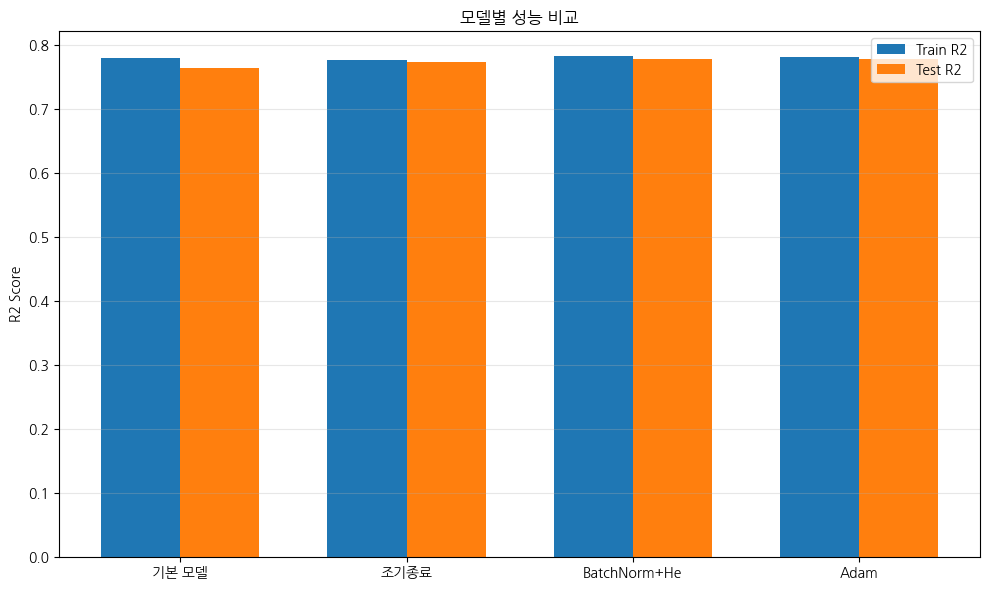

In [49]:
# 성능 비교 시각화
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(result_df['모델']))
width = 0.35

bars1 = ax.bar(x - width/2, result_df['Train R2'], width, label='Train R2')
bars2 = ax.bar(x + width/2, result_df['Test R2'], width, label='Test R2')

ax.set_ylabel('R2 Score')
ax.set_title('모델별 성능 비교')
ax.set_xticks(x)
ax.set_xticklabels(result_df['모델'])
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()